### Welcome to the demo notebook!

#### Start by installing the dependencies

In [5]:
%pip install -r requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import necessary modules

In [32]:
import os
import sys
sys.path.append('..')
from src import nns
from src import embedders
from src import segmodel
from demo_functions import run_image
%matplotlib inline

#### Initialize the model and the embedders

In [20]:
image_embr = embedders.M2FImageEmbedder()
text_embr = embedders.CLIPTextEmbedder()
model = nns.Linear(1, 1)

#### Load the model and test it out

Specify the labels and your image under file_list

In [21]:
model.load(path = "CSRUGDFineTuned")
smodel = segmodel.CSModel(image_embr, text_embr, model)

file_list = ['fp01.jpeg'] # Images to run the model on.
labels = ['void,sky,sign',
          'concrete,asphalt',
          'gravel,grass,dirt,sand,mulch',
          'rock,rock-bed',
          'water',
          'tree,pole,vehicle,container/generic-object,building,log,bicycle,person,fence,bush,picnic-table,bridge'] # Labels to look for.

labels = [st.split(',') for st in labels]

rough_labels = ['background', 'smooth terrain', 'rough terrain', 'bumpy terrain', 'forbidden terrain', 'obstacle']

for path in file_list:
    run_image(smodel, path, labels, multilabel = True, aggregation = 'max', rough_labels = rough_labels)

TypeError: Linear.load() got an unexpected keyword argument 'device'

Test without the rough labels

In [4]:
model.load("../weights/CSRUGDFineTuned")
smodel = segmodel.CSModel(image_embr, text_embr, model)

file_list = ['../FP/fp01.jpeg'] #Images to run the model on.
labels = ['dirt road', 'tree', 'sky', 'fence' 'other'] # Labels to look for.

for path in file_list:
    run_image(smodel, path, labels)

TypeError: Linear.load() missing 1 required positional argument: 'device'

Test a different model

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


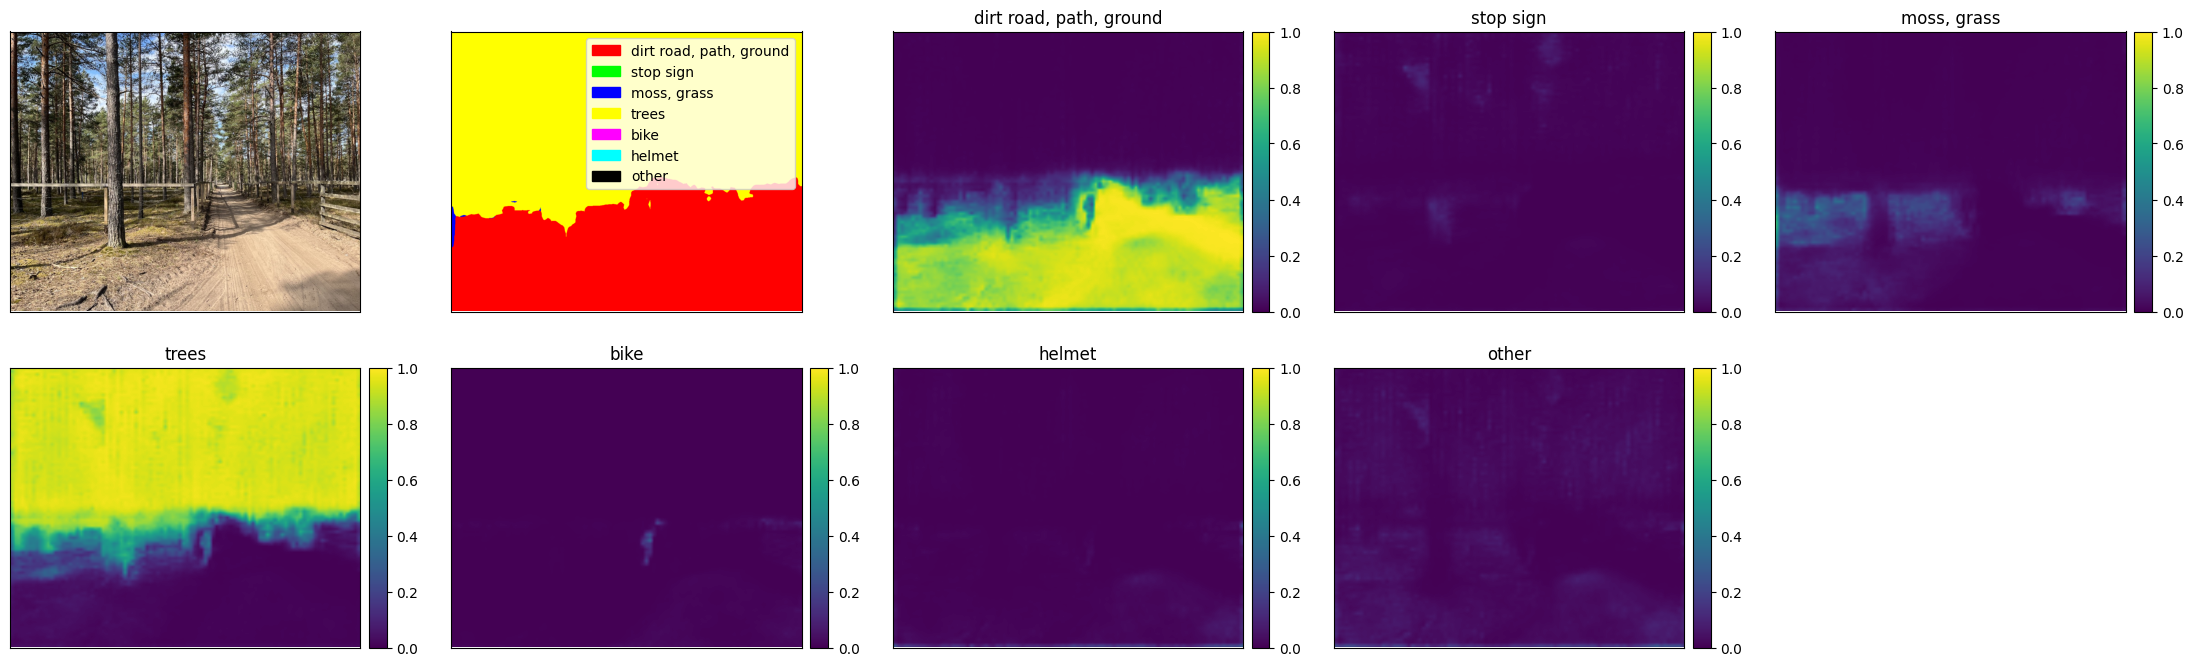

In [31]:
model.load("../weights/CSTableModel")
smodel = segmodel.CSModel(image_embr, text_embr, model)

file_list = ['../FP/fp01.jpeg'] # Images to run the model on.
labels = ['dirt road, path, ground', 'stop sign', 'moss, grass', 'trees', 'bike', 'helmet', 'other'] # Labels to look for.

for path in file_list:
    run_image(smodel, path, labels)